In [1]:
import Data_acq as data
from models import Encoder
from models import Decoder
from models import cVAE
import matplotlib.pyplot as plt
import importlib

Datos

In [2]:
import importlib
importlib.reload(data)
x_train, x_test,x_val ,y_train, y_test,y_val, x_train_1, y_train_1 = data.get_mnist_data(dataset="fashion")




Usando fashion como dataset


Enconder decoder


(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[-0.58763504  0.7076748 ]]
[[-0.8639032   0.07570936]]
[[-0.19041938  2.1356897 ]]
(784,)


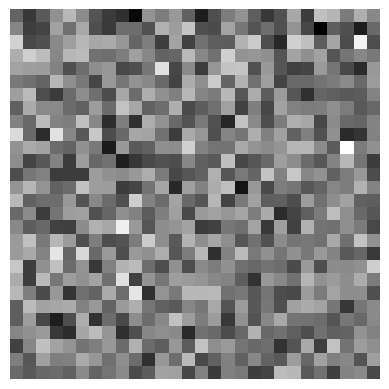

In [3]:
import importlib
import numpy as np
importlib.reload(Encoder)
importlib.reload(Decoder)

#img_dim=(28,28),condition_dim=(10,),intermediate_dim=128,latent_dim=2
#latent_dim=2, cond_dim=(10,), intermediate_dim=128, original_shape=(28, 28)

en = Encoder.build_enconder(intermediate_dim=128,latent_dim=2)
de = Decoder.build_decoder(intermediate_dim=128,latent_dim=2)


img_sample = np.expand_dims(x_train[0], axis=0)# shape (1, 28, 28)
cond_sample = np.expand_dims(y_train[0], axis=0) 
print(img_sample.shape)
[z, z_mean, z_log_var] = en.predict([img_sample,cond_sample])

img_recons = de.predict([z,cond_sample])

print(z)
print(z_mean)
print(z_log_var)
print(img_recons[0].shape)

plt.imshow(img_recons[0].reshape(28, 28), cmap="gray")
plt.axis("off")
plt.show()


In [4]:
import tensorflow as tf
from keras.callbacks import EarlyStopping

importlib.reload(cVAE)
original_dim = 28*28
beta = 1.0

train_dataset = tf.data.Dataset.from_tensor_slices(((x_train, y_train), x_train))
#train_dataset = train_dataset.shuffle(buffer_size=1024).batch(128)
train_dataset = train_dataset.batch(128)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

val_dataset = tf.data.Dataset.from_tensor_slices(((x_val, y_val), x_val))
val_dataset = val_dataset.batch(128)


cvae = cVAE.CVAE(encoder=en, decoder=de, original_dim=original_dim, beta=1)
cvae.compile(optimizer=tf.keras.optimizers.Adam())



In [5]:
cvae.fit(train_dataset,
        epochs=10,
        batch_size=128,
        validation_data=val_dataset,
        callbacks=[early_stopping]
         )

Epoch 1/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - kl_loss: 4.3522 - loss: 66.1105 - reconstruction_loss: 61.7583 - val_kl_loss: 3.5051 - val_loss: 30.6566 - val_reconstruction_loss: 27.2310
Epoch 2/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - kl_loss: 3.4621 - loss: 29.5248 - reconstruction_loss: 26.0626 - val_kl_loss: 3.4025 - val_loss: 27.9377 - val_reconstruction_loss: 24.6005
Epoch 3/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - kl_loss: 3.3625 - loss: 27.4339 - reconstruction_loss: 24.0713 - val_kl_loss: 3.3152 - val_loss: 27.0062 - val_reconstruction_loss: 23.7611
Epoch 4/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - kl_loss: 3.2910 - loss: 26.5562 - reconstruction_loss: 23.2652 - val_kl_loss: 3.2996 - val_loss: 26.2517 - val_reconstruction_loss: 23.0311
Epoch 5/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - kl_loss: 3.2463 - loss: 26.0037 - reconstruction_loss: 22.7574 - val_kl_loss: 3.1926 - val_loss: 25.9038 - val_reconstruction_loss: 22.7883
Epoch 6/10
430/430 ━━━━━━━━━━━

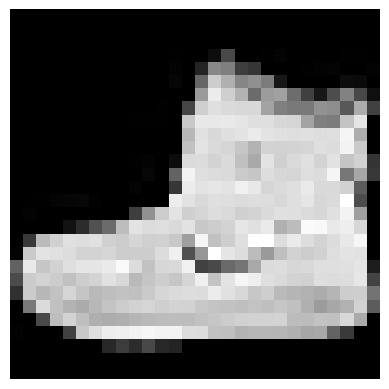

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
(1, 784)


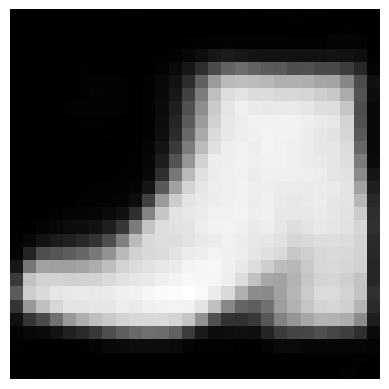

In [6]:
x_input = x_train[:1]         # 1 imagen (shape: (1, 28, 28))
cond_input = y_train[:1]      # su condición (shape: (1, 10))

plt.imshow(x_input[0].reshape(28, 28), cmap="gray")
plt.axis("off")
plt.show()

z_mean, z_log_var, z = cvae.encoder.predict([x_input, cond_input])

# Paso por el decoder para reconstrucción
reconstructed = cvae.decoder.predict([z, cond_input])
print(reconstructed.shape)
plt.imshow(reconstructed[0].reshape(28, 28), cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
'''
# Tomá una imagen del conjunto de test
indices_de_testeo=[1, 3, 5, 7, 2, 0, 13, 15, 17, 4] # inidices donde para que x_train[inidicies] sea 0 1 2 3 4 5 6 7 8 9 0

for i in indices_de_testeo:

    imagen = x_train[i]
    #plt.imshow(imagen)
    #plt.show()
    # Visualizá cómo se reconstruye con todas las condiciones posibles
    vis.condiciones(cvae, imagen)
# Ver 10 variantes generadas para la clase 3
for i in range(10):
    
    vis.variantes(cvae, condicion_id=i, num_variantes=10)
'''

'\n# Tomá una imagen del conjunto de test\nindices_de_testeo=[1, 3, 5, 7, 2, 0, 13, 15, 17, 4] # inidices donde para que x_train[inidicies] sea 0 1 2 3 4 5 6 7 8 9 0\n\nfor i in indices_de_testeo:\n\n    imagen = x_train[i]\n    #plt.imshow(imagen)\n    #plt.show()\n    # Visualizá cómo se reconstruye con todas las condiciones posibles\n    vis.condiciones(cvae, imagen)\n'

NameError: name 'vis' is not defined

# Predictores

In [9]:
import models.Predictor as predictores
importlib.reload(predictores)

predictor = predictores.build_predictor() 

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

predictor.compile(optimizer, loss="categorical_crossentropy")

#x_rain_conv = np.reshape(x_train,(28,28,1)) 
predictor.fit(
    x=x_train,
    y=y_train,
    batch_size=128,
    epochs=5,
    validation_data=(x_val, y_val)  # Include validation data
#    callbacks=[cp_callback_predictor_C2, early_stopping]  # Add early_stopping to callbacks
)

Model: "predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ original_input (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_layer (ReshapeLayer)    │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        31,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,570 (197.54 KB)

 Trainable params: 50,378 (196.79 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - loss: 0.8335 - val_loss: 0.5775
Epoch 2/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.4206 - val_loss: 0.3140
Epoch 3/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.3493 - val_loss: 0.3164
Epoch 4/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.3222 - val_loss: 0.2848
Epoch 5/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.2977 - val_loss: 0.2820


(784,)


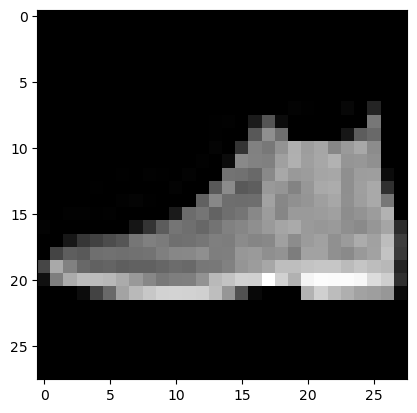

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Digito predicho: 9


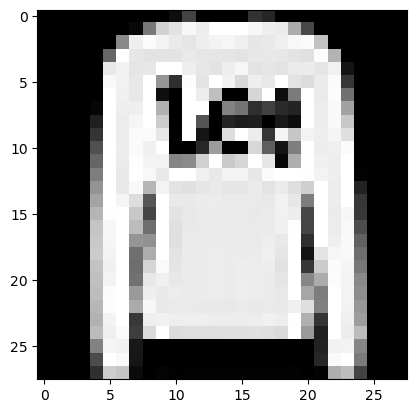

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Digito predicho: 2


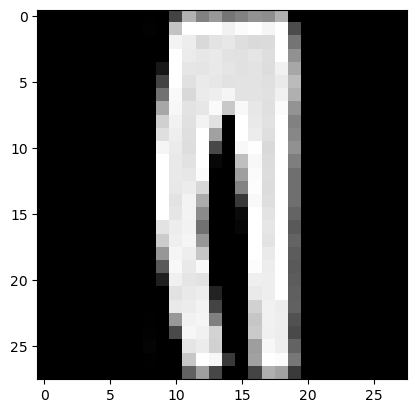

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Digito predicho: 1


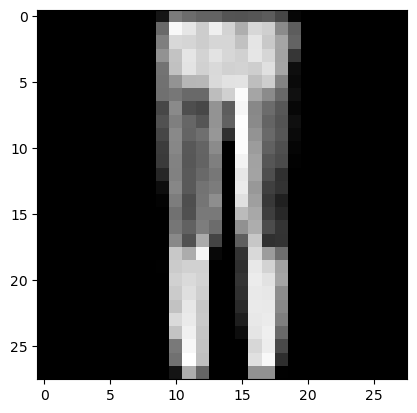

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Digito predicho: 1


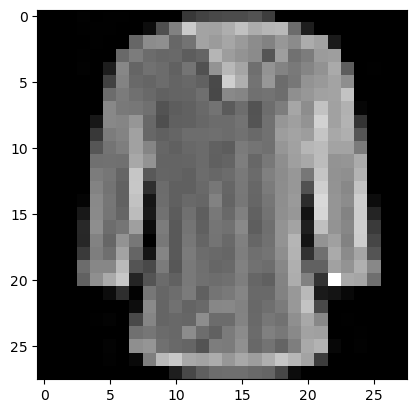

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Digito predicho: 6


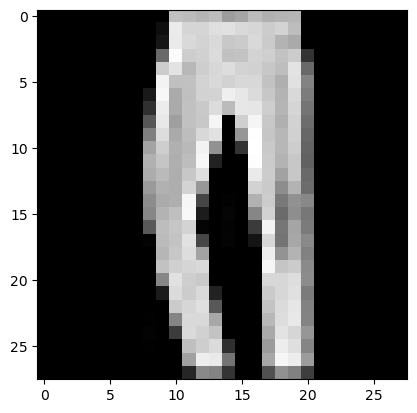

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Digito predicho: 1


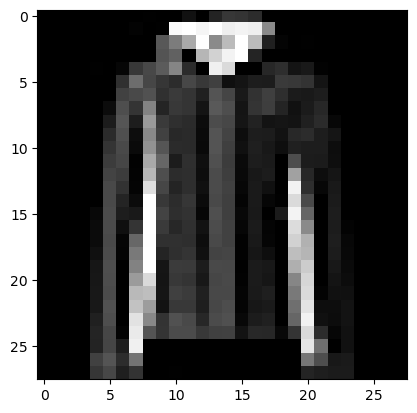

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Digito predicho: 4


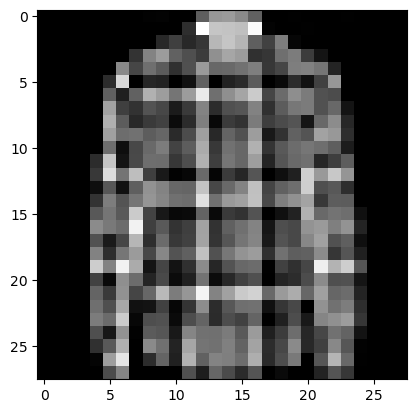

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Digito predicho: 6


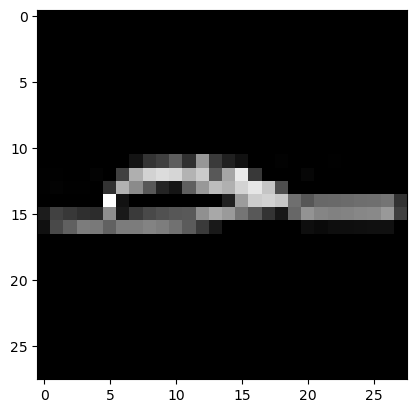

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Digito predicho: 5


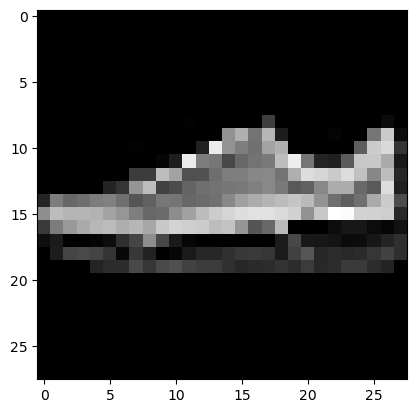

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Digito predicho: 7


In [10]:
print(x_test[0].shape)
for i in range(10):
    plt.imshow(x_test[i].reshape(28, 28),cmap="gray")
    plt.show()
    print("dentro del loop")
    print(x_test[i].shape)
    print(f"Digito predicho: {np.argmax( predictor.predict(x_test[i].reshape(1, 784)))}")

# Pruebas de separacion de digitos


Shape de x_train
(10, 784)
ITERACIÓN A:  0
ITERACIÓN A:  1
ITERACIÓN A:  2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
select_1:       tf.Tensor([1 0 0 0 0 1 1 1 0 0], shape=(10,), dtype=int64)
select_1_1:     tf.Tensor([0 0 1 1 0 0 0 0 1 1], shape=(10,), dtype=int64)
################################################################################################
formas de x y select_1 

(10, 784)
(10, 784)
(10, 1)
(10, 1)
################################################################################################
y_reduced:    tf.Tensor([9 0 0 3 0 2 7 2 5 5], shape=(10,), dtype=int64)
y_1_reduced:  tf.Tensor([7 5 7 7 8 6 5 9 2 6], shape=(10,), dtype=int64)
y_s1:          tf.Tensor([9 0 0 0 0 2 7 2 0 0], shape=(10,), dtype=int

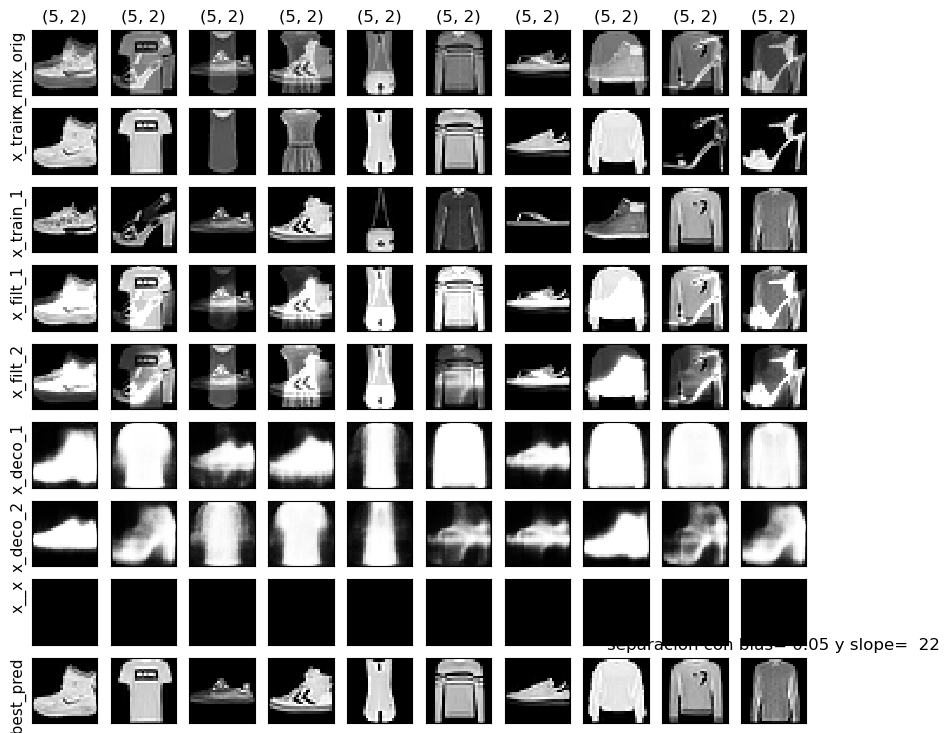

Fig.: En la primera fila se observan las imágenes de TRAIN superpuestas, las componentes en las dos siguientes,
      la reconstrucción final en la cuarta, la mejor imagen original basada en MSE en la quinta y en la última
      la mejor imagen según la predicción.
Shape de x_train
(10, 784)
ITERACIÓN A:  0
ITERACIÓN A:  1
ITERACIÓN A:  2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
select_1:       tf.Tensor([1 0 0 0 0 1 1 1 0 0], shape=(10,), dtype=int64)
select_1_1:     tf.Tensor([0 0 1 1 0 0 0 0 1 1], shape=(10,), dtype=int64)
################################################################################################
formas de x y select_1 

(10, 784)
(10, 784)
(10, 1)
(10, 1)
###############################################

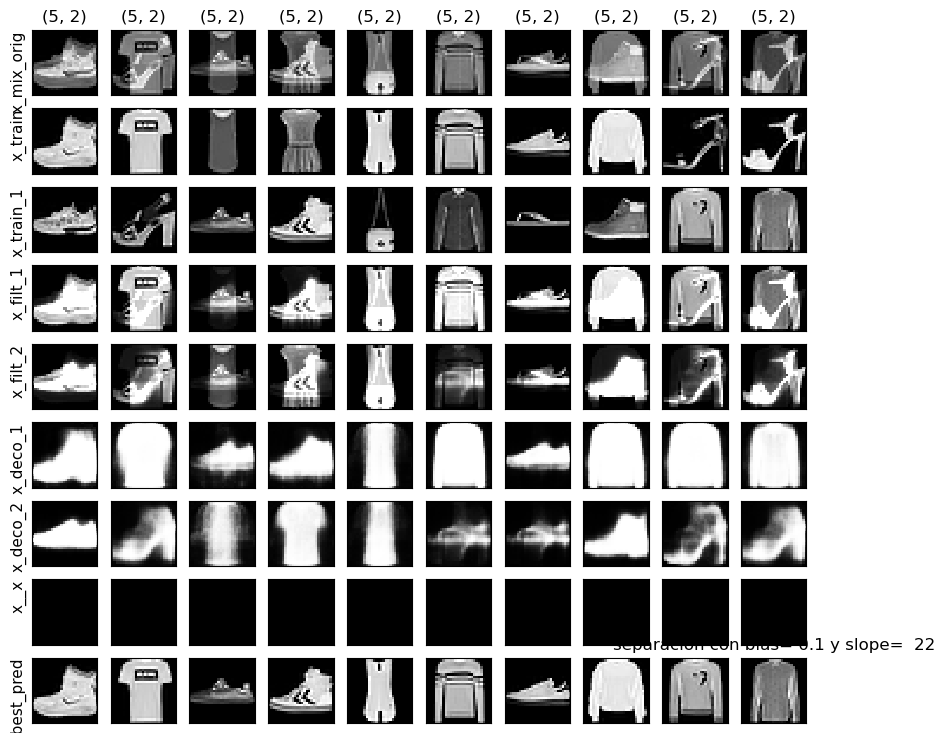

Fig.: En la primera fila se observan las imágenes de TRAIN superpuestas, las componentes en las dos siguientes,
      la reconstrucción final en la cuarta, la mejor imagen original basada en MSE en la quinta y en la última
      la mejor imagen según la predicción.
Shape de x_train
(10, 784)
ITERACIÓN A:  0
ITERACIÓN A:  1
ITERACIÓN A:  2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
select_1:       tf.Tensor([1 0 0 0 0 1 1 1 0 0], shape=(10,), dtype=int64)
select_1_1:     tf.Tensor([0 0 1 1 0 0 0 0 1 1], shape=(10,), dtype=int64)
################################################################################################
formas de x y select_1 

(10, 784)
(10, 784)
(10, 1)
(10, 1)
###############################################

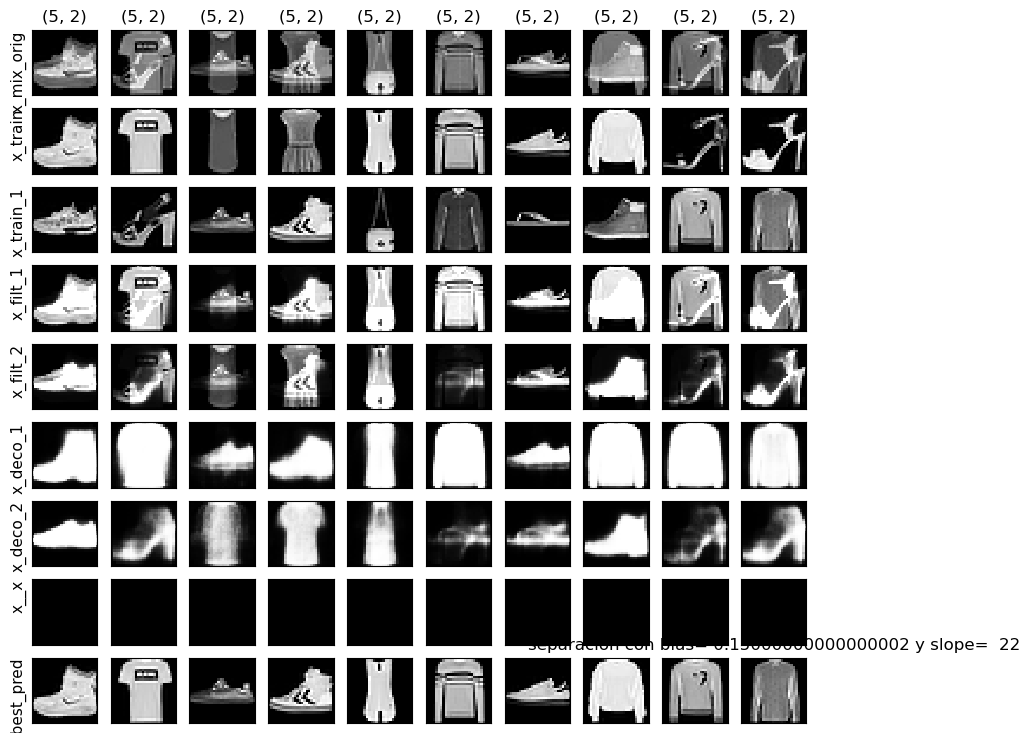

Fig.: En la primera fila se observan las imágenes de TRAIN superpuestas, las componentes en las dos siguientes,
      la reconstrucción final en la cuarta, la mejor imagen original basada en MSE en la quinta y en la última
      la mejor imagen según la predicción.
Shape de x_train
(10, 784)
ITERACIÓN A:  0
ITERACIÓN A:  1
ITERACIÓN A:  2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
select_1:       tf.Tensor([1 0 0 0 0 1 1 1 0 0], shape=(10,), dtype=int64)
select_1_1:     tf.Tensor([0 0 1 0 0 0 0 0 1 1], shape=(10,), dtype=int64)
################################################################################################
formas de x y select_1 

(10, 784)
(10, 784)
(10, 1)
(10, 1)
###############################################

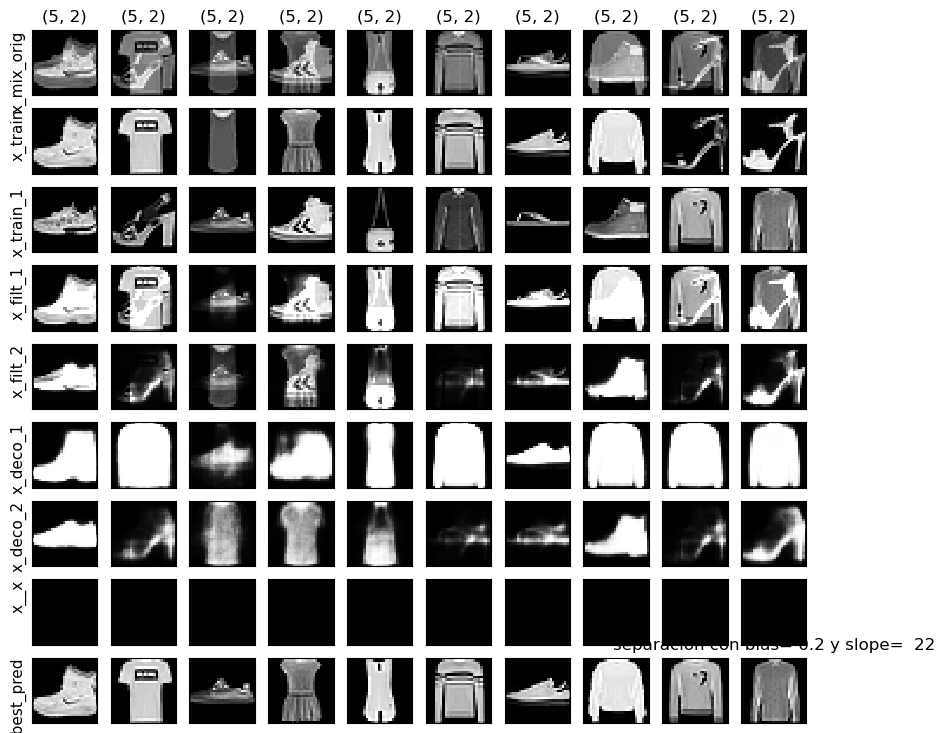

Fig.: En la primera fila se observan las imágenes de TRAIN superpuestas, las componentes en las dos siguientes,
      la reconstrucción final en la cuarta, la mejor imagen original basada en MSE en la quinta y en la última
      la mejor imagen según la predicción.
Shape de x_train
(10, 784)
ITERACIÓN A:  0
ITERACIÓN A:  1
ITERACIÓN A:  2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
select_1:       tf.Tensor([1 0 0 0 0 1 1 1 0 0], shape=(10,), dtype=int64)
select_1_1:     tf.Tensor([0 0 0 0 0 0 0 0 1 1], shape=(10,), dtype=int64)
################################################################################################
formas de x y select_1 

(10, 784)
(10, 784)
(10, 1)
(10, 1)
###############################################

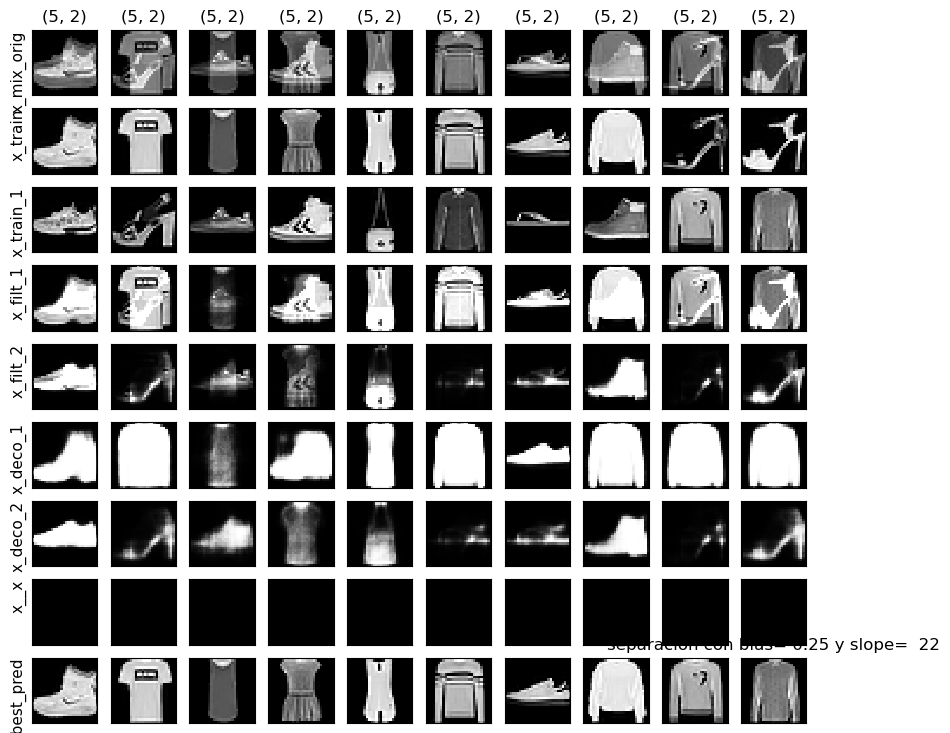

Fig.: En la primera fila se observan las imágenes de TRAIN superpuestas, las componentes en las dos siguientes,
      la reconstrucción final en la cuarta, la mejor imagen original basada en MSE en la quinta y en la última
      la mejor imagen según la predicción.


In [13]:
import inferencias.inferencia as inf
import importlib
importlib.reload(inf)

for i in range(5):

    inf.separar_digitos(x_train[0:10],x_train_1[0:10],y_train[0:10],y_train_1[0:10],en,de,predictor,bias=0.05*(i+1))